In [16]:
#Importing the modules we need..
import numpy as np

from scipy import stats

import matplotlib.pyplot as plt

from sklearn import linear_model
from sklearn import tree
from sklearn import metrics
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, accuracy_score, confusion_matrix, roc_auc_score, roc_curve
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, KFold, cross_val_score, StratifiedKFold, LeaveOneOut, LeavePOut, ShuffleSplit
from sklearn.neighbors import KNeighborsClassifier

from sklearn.ensemble import BaggingClassifier

import pandas as pd

from scipy.cluster.hierarchy import dendrogram, linkage

In [2]:
speed = [99,86,87,88,111,86,103,87,94,78,77,85,86]

x1 = numpy.mean(speed)
x2 = numpy.median(speed)

print(x1)
print(x2)

89.76923076923077
87.0


In [5]:
x3 = stats.mode(speed)

print(x3)

ModeResult(mode=array([86]), count=array([3]))


<ipython-input-5-f6bd1da0f9d4>:3: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  x3 = stats.mode(speed)


In [6]:
speed4 = [86,87,88,86,87,85,86]
speed5 = [32,111,138,28,59,77,97]

x4 = numpy.std(speed4)
x5 = numpy.std(speed5)

print(x4)
print(x5)

0.9035079029052513
37.84501153334721


In [7]:
x6 = numpy.var(speed5)

print(x6)

1432.2448979591834


In [12]:
ages = [5,31,43,48,50,41,7,11,15,39,80,82,32,2,8,6,25,36,27,61,31]

x7 = numpy.percentile(ages, 25)

print(x7)

11.0


In [14]:
x8 = numpy.random.uniform(0.0, 5.0, 250)

print(x8)

[3.55865407e+00 1.96423270e-01 6.91769182e-01 3.14852443e+00
 2.29566585e+00 4.39077244e+00 2.57667784e+00 7.73982730e-01
 3.61011334e-01 2.46607989e+00 3.75499559e+00 1.46001188e+00
 2.69336280e+00 4.01010416e+00 1.84437165e+00 3.95730927e+00
 3.75408582e+00 2.85365502e+00 1.48191090e+00 2.27543049e+00
 2.52221009e+00 4.36783509e+00 8.20195331e-01 1.59129361e+00
 1.57665533e+00 1.16443633e+00 4.54664591e+00 3.58872100e+00
 9.37760778e-01 1.04769806e+00 3.48813528e+00 4.02176424e-01
 4.07209713e+00 1.86013862e+00 4.11655148e+00 1.03747499e+00
 4.76894172e+00 1.94166162e+00 3.81817007e+00 1.54712599e-01
 2.70267191e+00 3.37530927e-01 4.46246401e-01 1.81510799e+00
 7.95898783e-01 4.23324528e-01 1.17297408e+00 1.67623338e+00
 1.24811082e+00 3.26104226e+00 4.25561052e+00 2.60820594e-01
 4.61540602e+00 2.28088983e+00 4.66712695e+00 3.41579938e+00
 3.82752585e+00 2.12591236e+00 1.60387242e+00 3.29941633e+00
 1.60850516e-01 4.71197536e+00 4.76529485e+00 7.63787888e-01
 1.38199031e+00 2.405085

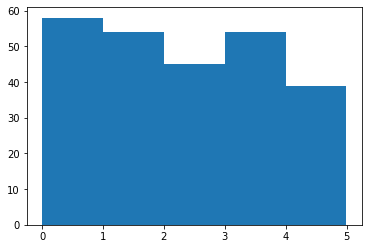

In [15]:
plt.hist(x8, 5)
plt.show()

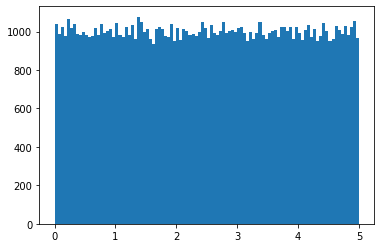

In [16]:
x9 = numpy.random.uniform(0.0, 5.0, 100000)

plt.hist(x9, 100)
plt.show()

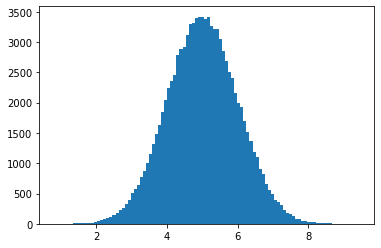

In [28]:
x10 = numpy.random.normal(5.0, 1.0, 100000)

plt.hist(x10, 100)
plt.show()

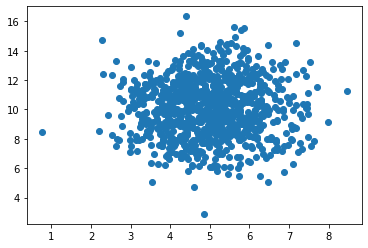

In [6]:
x = numpy.random.normal(5.0, 1.0, 1000)
y = numpy.random.normal(10.0, 2.0, 1000)

plt.scatter(x, y)
plt.show()

The speed of a 10 years old car:  85.59308314937454
The coefficient of correlation:  -0.7585915243761551


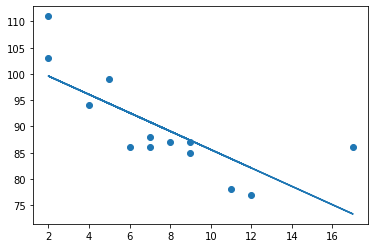

In [9]:
a = [5,7,8,7,2,17,2,9,4,11,12,9,6]
b = [99,86,87,88,111,86,103,87,94,78,77,85,86]

slope, intercept, r, p, std_err = stats.linregress(a, b)

def myfunc(x):
  return slope * x + intercept

mymodel = list(map(myfunc, a))
speed10=myfunc(10)

print("The speed of a 10 years old car: ", speed10)
print("The coefficient of correlation: ", r)
plt.scatter(a, b)
plt.plot(a, mymodel)
plt.show()

0.013318141542974947


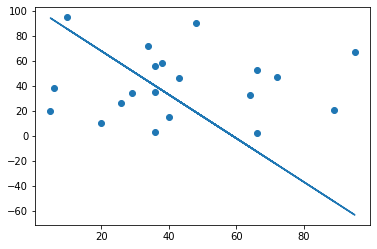

In [10]:
#bad fit for linear regression
x11 = [89,43,36,36,95,10,66,34,38,20,26,29,48,64,6,5,36,66,72,40]
y11 = [21,46,3,35,67,95,53,72,58,10,26,34,90,33,38,20,56,2,47,15]

slope11, intercept11, r11, p11, std_err11 = stats.linregress(x11, y11)

def myfunc(x):
  return slope * x + intercept

mymodel = list(map(myfunc, x11))

print(r11)
plt.scatter(x11, y11)
plt.plot(x11, mymodel)
plt.show()

88.87331269698007
0.9432150416451026


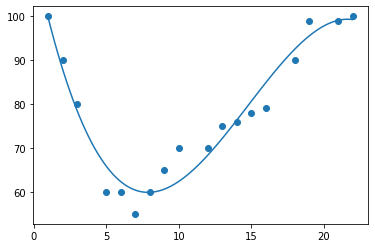

In [21]:
x12 = [1,2,3,5,6,7,8,9,10,12,13,14,15,16,18,19,21,22]
y12 = [100,90,80,60,60,55,60,65,70,70,75,76,78,79,90,99,99,100]

mymodel12 = numpy.poly1d(numpy.polyfit(x12, y12, 3))

myline12 = numpy.linspace(1, 22, 100)
speed17 = mymodel12(17)

print(speed17)
print(r2_score(y12, mymodel12(x12)))
plt.scatter(x12, y12)
plt.plot(myline12, mymodel12(myline12))
plt.show()

0.009952707566680652


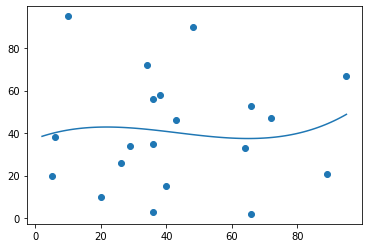

In [23]:
x13 = [89,43,36,36,95,10,66,34,38,20,26,29,48,64,6,5,36,66,72,40]
y13 = [21,46,3,35,67,95,53,72,58,10,26,34,90,33,38,20,56,2,47,15]

mymodel13 = numpy.poly1d(numpy.polyfit(x13, y13, 3))

myline13 = numpy.linspace(2, 95, 100)

print(r2_score(y13, mymodel13(x13)))
plt.scatter(x13, y13)
plt.plot(myline13, mymodel13(myline13))
plt.show()

In [9]:
#Multiple_Regression
#Coefficient
df = pandas.read_csv("Input/data.csv")

X_1 = df[['Weight', 'Volume']]
y_1 = df['CO2']

regr = linear_model.LinearRegression()
regr.fit(X_1, y_1)

#predict the CO2 emission of a car where the weight is 2300kg, and the volume is 1300cm3:
predictedCO2 = regr.predict([[2300, 1300]])

scale = StandardScaler()
scaledX = scale.fit_transform(X_1)

print("Coefficient: ", regr.coef_)
print("Predicted CO2: ", predictedCO2)
print("scaledX: ", scaledX)


Coefficient:  [0.00755095 0.00780526]
Predicted CO2:  [107.2087328]
scaledX:  [[-2.10389253 -1.59336644]
 [-0.55407235 -1.07190106]
 [-1.52166278 -1.59336644]
 [-1.78973979 -1.85409913]
 [-0.63784641 -0.28970299]
 [-1.52166278 -1.59336644]
 [-0.76769621 -0.55043568]
 [ 0.3046118  -0.28970299]
 [-0.7551301  -0.28970299]
 [-0.59595938 -0.0289703 ]
 [-1.30803892 -1.33263375]
 [-1.26615189 -0.81116837]
 [-0.7551301  -1.59336644]
 [-0.16871166 -0.0289703 ]
 [ 0.14125238 -0.0289703 ]
 [ 0.15800719 -0.0289703 ]
 [ 0.3046118  -0.0289703 ]
 [-0.05142797  1.53542584]
 [-0.72580918 -0.0289703 ]
 [ 0.14962979  1.01396046]
 [ 1.2219378  -0.0289703 ]
 [ 0.5685001   1.01396046]
 [ 0.3046118   1.27469315]
 [ 0.51404696 -0.0289703 ]
 [ 0.51404696  1.01396046]
 [ 0.72348212 -0.28970299]
 [ 0.8281997   1.01396046]
 [ 1.81254495  1.01396046]
 [ 0.96642691 -0.0289703 ]
 [ 1.72877089  1.01396046]
 [ 1.30990057  1.27469315]
 [ 1.90050772  1.01396046]
 [-0.23991961 -0.0289703 ]
 [ 0.40932938 -0.0289703 ]
 [ 0

c:\Users\ara\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [15]:
scale = StandardScaler()

df = pandas.read_csv("Input/data.csv")

X_2 = df[['Weight', 'Volume']]
y_2 = df['CO2']

scaledX_2 = scale.fit_transform(X_2)

regr_2 = linear_model.LinearRegression()
regr_2.fit(scaledX_2, y_2)

scaled_2 = scale.transform([[2300, 1.3]])

predictedCO2_2 = regr_2.predict([scaled_2[0]])
print("predictedCO2: ", predictedCO2_2)

predictedCO2:  [97.07204485]


c:\Users\ara\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


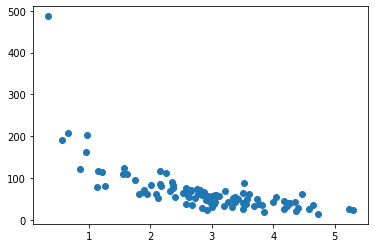

In [4]:
#Train/Test
numpy.random.seed(2)

x14 = numpy.random.normal(3, 1, 100)
y14 = numpy.random.normal(150, 40, 100) / x14

plt.scatter(x14, y14)
plt.show()

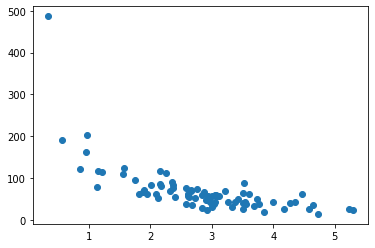

In [5]:
train_x14 = x14[:80]
train_y14 = y14[:80]

test_x14 = x14[80:]
test_y14 = y14[80:]

plt.scatter(train_x14, train_y14)
plt.show()

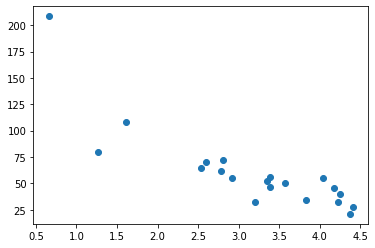

In [6]:
plt.scatter(test_x14, test_y14)
plt.show()

r2_train:  0.7988645544629794
r2_test:  0.8086921460343559
Predict for 5min in shop:  22.879625918114925


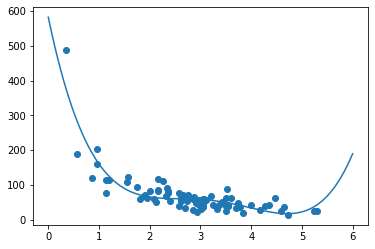

In [13]:
mymodel14 = numpy.poly1d(numpy.polyfit(train_x14, train_y14, 4))

myline14 = numpy.linspace(0, 6, 100)
r2_train = r2_score(train_y14, mymodel14(train_x14))
r2_test = r2_score(test_y14, mymodel14(test_x14))

print("r2_train: ", r2_train)
print("r2_test: ", r2_test)
print("Predict for 5min in shop: ", mymodel14(5))

plt.scatter(train_x14, train_y14)
plt.plot(myline14, mymodel14(myline14))
plt.show()

In [18]:
df2 = pandas.read_csv("Input/data2.csv")

print(df2)

    Age  Experience  Rank Nationality   Go
0    36          10     9          UK   NO
1    42          12     4         USA   NO
2    23           4     6           N   NO
3    52           4     4         USA   NO
4    43          21     8         USA  YES
5    44          14     5          UK   NO
6    66           3     7           N  YES
7    35          14     9          UK  YES
8    52          13     7           N  YES
9    35           5     9           N  YES
10   24           3     5         USA   NO
11   18           3     7          UK  YES
12   45           9     9          UK  YES


In [19]:
d = {'UK': 0, 'USA': 1, 'N': 2}
df2['Nationality'] = df2['Nationality'].map(d)
d = {'YES': 1, 'NO': 0}
df2['Go'] = df2['Go'].map(d)

print(df2)

    Age  Experience  Rank  Nationality  Go
0    36          10     9            0   0
1    42          12     4            1   0
2    23           4     6            2   0
3    52           4     4            1   0
4    43          21     8            1   1
5    44          14     5            0   0
6    66           3     7            2   1
7    35          14     9            0   1
8    52          13     7            2   1
9    35           5     9            2   1
10   24           3     5            1   0
11   18           3     7            0   1
12   45           9     9            0   1


In [23]:
features = ['Age', 'Experience', 'Rank', 'Nationality']

X_3 = df2[features]
y_3 = df2['Go']

print(X_3)
print(y_3)

    Age  Experience  Rank  Nationality
0    36          10     9            0
1    42          12     4            1
2    23           4     6            2
3    52           4     4            1
4    43          21     8            1
5    44          14     5            0
6    66           3     7            2
7    35          14     9            0
8    52          13     7            2
9    35           5     9            2
10   24           3     5            1
11   18           3     7            0
12   45           9     9            0
0     0
1     0
2     0
3     0
4     1
5     0
6     1
7     1
8     1
9     1
10    0
11    1
12    1
Name: Go, dtype: int64


[Text(0.4, 0.875, 'Rank <= 6.5\ngini = 0.497\nsamples = 13\nvalue = [6, 7]'),
 Text(0.2, 0.625, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(0.6, 0.625, 'Age <= 39.5\ngini = 0.219\nsamples = 8\nvalue = [1, 7]'),
 Text(0.4, 0.375, 'Age <= 35.5\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(0.2, 0.125, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.6, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.8, 0.375, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]')]

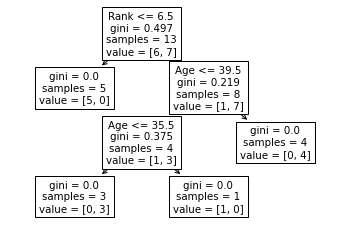

In [24]:
dtree = DecisionTreeClassifier()
dtree = dtree.fit(X_3, y_3)

tree.plot_tree(dtree, feature_names=features)

In [31]:
print(dtree.predict([[40, 10, 7, 1]]))

print(dtree.predict([[40, 10, 6, 1]]))

[1]
[0]


c:\Users\ara\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\ara\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


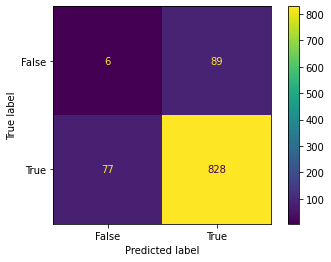

In [33]:
#Confusion matrix
actual = numpy.random.binomial(1,.9,size = 1000)
predicted = numpy.random.binomial(1,.9,size = 1000)

confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [35]:
Accuracy = metrics.accuracy_score(actual, predicted)
Precision = metrics.precision_score(actual, predicted)
Sensitivity_recall = metrics.recall_score(actual, predicted)
Specificity = metrics.recall_score(actual, predicted, pos_label=0)
F1_score = metrics.f1_score(actual, predicted)

print({"Accuracy":Accuracy,"Precision":Precision,"Sensitivity_recall":Sensitivity_recall,"Specificity":Specificity,"F1_score":F1_score})

{'Accuracy': 0.834, 'Precision': 0.9029443838604144, 'Sensitivity_recall': 0.9149171270718232, 'Specificity': 0.06315789473684211, 'F1_score': 0.9088913282107574}


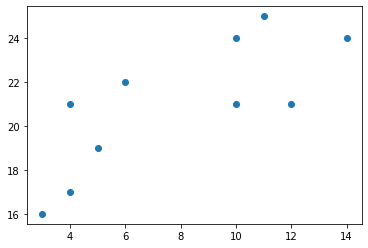

In [5]:
#Hierarchical Clustering
x15 = [4, 5, 10, 4, 3, 11, 14 , 6, 10, 12]
y15 = [21, 19, 24, 17, 16, 25, 24, 22, 21, 21]

plt.scatter(x15, y15)
plt.show()

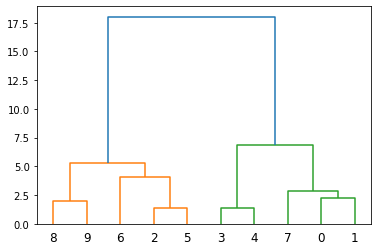

In [6]:
data15 = list(zip(x15, y15))

linkage_data15 = linkage(data15, method='ward', metric='euclidean')
dendrogram(linkage_data15)

plt.show()

c:\Users\ara\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


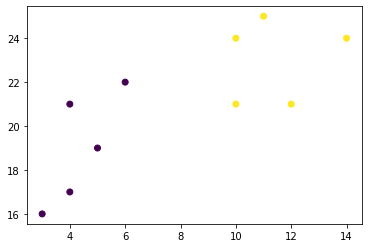

In [8]:
hierarchical_cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
labels15 = hierarchical_cluster.fit_predict(data15)

plt.scatter(x15, y15, c=labels15)
plt.show()

In [20]:
#Logistic Regression
#Reshaped for Logistic function.
X_4 = numpy.array([3.78, 2.44, 2.09, 0.14, 1.72, 1.65, 4.92, 4.37, 4.96, 4.52, 3.69, 5.88]).reshape(-1,1)
y_4 = numpy.array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

logr_4 = linear_model.LogisticRegression()
logr_4.fit(X_4,y_4)

#predict if tumor is cancerous where the size is 3.46mm:
predicted_4 = logr_4.predict(numpy.array([3.46]).reshape(-1,1))
print("Predicted for 3.46 tumor: ", predicted_4)

#Coefficient
log_odds = logr_4.coef_
odds = numpy.exp(log_odds)

print("odds: ", odds)

#Probability Function
def logit2prob(logr,x):
  log_odds = logr.coef_ * x + logr.intercept_
  odds = numpy.exp(log_odds)
  probability = odds / (1 + odds)
  return(probability)

print("Probability", logit2prob(logr_4, X_4))


Predicted for 3.46 tumor:  [0]
odds:  [[4.03541657]]
Probability [[0.60749955]
 [0.19268876]
 [0.12775886]
 [0.00955221]
 [0.08038616]
 [0.07345637]
 [0.88362743]
 [0.77901378]
 [0.88924409]
 [0.81293497]
 [0.57719129]
 [0.96664243]]


In [29]:
#Grid Search
iris = datasets.load_iris()

X = iris['data']
y = iris['target']

logit = LogisticRegression(max_iter = 10000)

print(logit.fit(X,y))

print(logit.score(X,y))

C = [0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2]

scores = []

for choice in C:
  logit.set_params(C=choice)
  logit.fit(X, y)
  scores.append(logit.score(X, y))

print(scores)

LogisticRegression(max_iter=10000)
0.9733333333333334
[0.9666666666666667, 0.9666666666666667, 0.9733333333333334, 0.9733333333333334, 0.98, 0.98, 0.9866666666666667, 0.9866666666666667]


In [6]:
#Categorical Data
cars = pd.read_csv('Input/data.csv')
ohe_cars = pd.get_dummies(cars[['Car']])

print(cars.to_string())
print(ohe_cars.to_string())

           Car       Model  Volume  Weight  CO2
0       Toyoty        Aygo    1000     790   99
1   Mitsubishi  Space Star    1200    1160   95
2        Skoda      Citigo    1000     929   95
3         Fiat         500     900     865   90
4         Mini      Cooper    1500    1140  105
5           VW         Up!    1000     929  105
6        Skoda       Fabia    1400    1109   90
7     Mercedes     A-Class    1500    1365   92
8         Ford      Fiesta    1500    1112   98
9         Audi          A1    1600    1150   99
10     Hyundai         I20    1100     980   99
11      Suzuki       Swift    1300     990  101
12        Ford      Fiesta    1000    1112   99
13       Honda       Civic    1600    1252   94
14      Hundai         I30    1600    1326   97
15        Opel       Astra    1600    1330   97
16         BMW           1    1600    1365   99
17       Mazda           3    2200    1280  104
18       Skoda       Rapid    1600    1119  104
19        Ford       Focus    2000    13

In [7]:
X_5 = pd.concat([cars[['Volume', 'Weight']], ohe_cars], axis=1)
y_5 = cars['CO2']

regr_5 = linear_model.LinearRegression()
regr_5.fit(X_5,y_5)

##predict the CO2 emission of a Volvo where the weight is 2300kg, and the volume is 1300cm3:
predictedCO2_5 = regr_5.predict([[2300, 1300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0]])

print(predictedCO2_5)

[122.45153299]


c:\Users\ara\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [9]:
colors = pd.DataFrame({'color': ['blue', 'red']})
dummies = pd.get_dummies(colors, drop_first=True)

print(colors)
print(dummies)

  color
0  blue
1   red
   color_red
0          0
1          1


In [10]:
dummies['color'] = colors['color']

print(dummies)

   color_red color
0          0  blue
1          1   red


c:\Users\ara\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ara\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ara\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ara\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_in

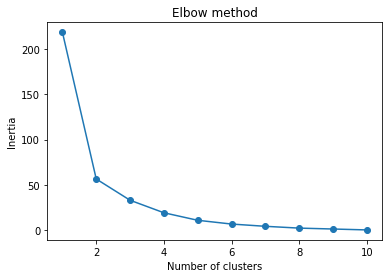

In [8]:
#K-means
inertias = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data15)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

c:\Users\ara\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


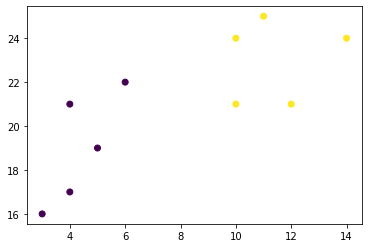

In [10]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(data15)

plt.scatter(x15, y15, c=kmeans.labels_)
plt.show()

In [12]:
#Bagging
#Evaluating a Base Classifier

data = datasets.load_wine(as_frame = True)

X_6 = data.data
y_6 = data.target

X_train, X_test, y_train, y_test = train_test_split(X_6, y_6, test_size = 0.25, random_state = 22)

dtree = DecisionTreeClassifier(random_state = 22)
dtree.fit(X_train,y_train)

y_pred = dtree.predict(X_test)

print("Train data accuracy:",accuracy_score(y_true = y_train, y_pred = dtree.predict(X_train)))
print("Test data accuracy:",accuracy_score(y_true = y_test, y_pred = y_pred))


Train data accuracy: 1.0
Test data accuracy: 0.8222222222222222


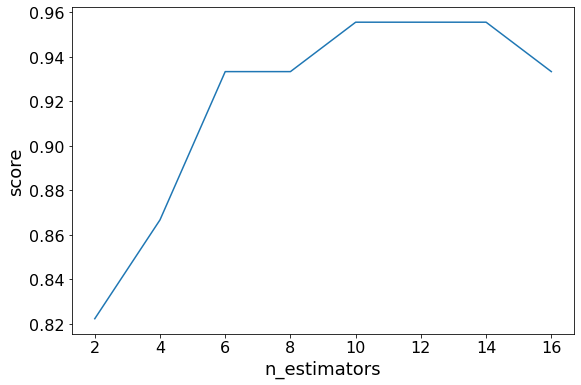

In [14]:
#Bagging
#Creating a Bagging Classifier

data = datasets.load_wine(as_frame = True)

X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 22)

estimator_range = [2,4,6,8,10,12,14,16]

models = []
scores = []

for n_estimators in estimator_range:

    # Create bagging classifier
    clf = BaggingClassifier(n_estimators = n_estimators, random_state = 22)

    # Fit the model
    clf.fit(X_train, y_train)

    # Append the model and score to their respective list
    models.append(clf)
    scores.append(accuracy_score(y_true = y_test, y_pred = clf.predict(X_test)))

# Generate the plot of scores against number of estimators
plt.figure(figsize=(9,6))
plt.plot(estimator_range, scores)

# Adjust labels and font (to make visable)
plt.xlabel("n_estimators", fontsize = 18)
plt.ylabel("score", fontsize = 18)
plt.tick_params(labelsize = 16)

# Visualize plot
plt.show()

In [15]:
#Bagging
#Another Form of Evaluation

data = datasets.load_wine(as_frame = True)

X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 22)

oob_model = BaggingClassifier(n_estimators = 12, oob_score = True,random_state = 22)

oob_model.fit(X_train, y_train)

print(oob_model.oob_score_)

0.9398496240601504


[Text(0.4583333333333333, 0.875, 'proline <= 727.5\ngini = 0.611\nsamples = 82\nvalue = [54, 60, 19]'),
 Text(0.25, 0.625, 'flavanoids <= 1.335\ngini = 0.339\nsamples = 47\nvalue = [0, 58, 16]'),
 Text(0.16666666666666666, 0.375, 'hue <= 0.92\ngini = 0.266\nsamples = 15\nvalue = [0, 3, 16]'),
 Text(0.08333333333333333, 0.125, 'gini = 0.0\nsamples = 13\nvalue = [0, 0, 16]'),
 Text(0.25, 0.125, 'gini = 0.0\nsamples = 2\nvalue = [0, 3, 0]'),
 Text(0.3333333333333333, 0.375, 'gini = 0.0\nsamples = 32\nvalue = [0, 55, 0]'),
 Text(0.6666666666666666, 0.625, 'flavanoids <= 1.605\ngini = 0.159\nsamples = 35\nvalue = [54, 2, 3]'),
 Text(0.5, 0.375, 'color_intensity <= 4.325\ngini = 0.375\nsamples = 3\nvalue = [0, 1, 3]'),
 Text(0.4166666666666667, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.5833333333333334, 0.125, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 3]'),
 Text(0.8333333333333334, 0.375, 'magnesium <= 147.0\ngini = 0.036\nsamples = 32\nvalue = [54, 1, 0]'),
 Text(0.75, 0

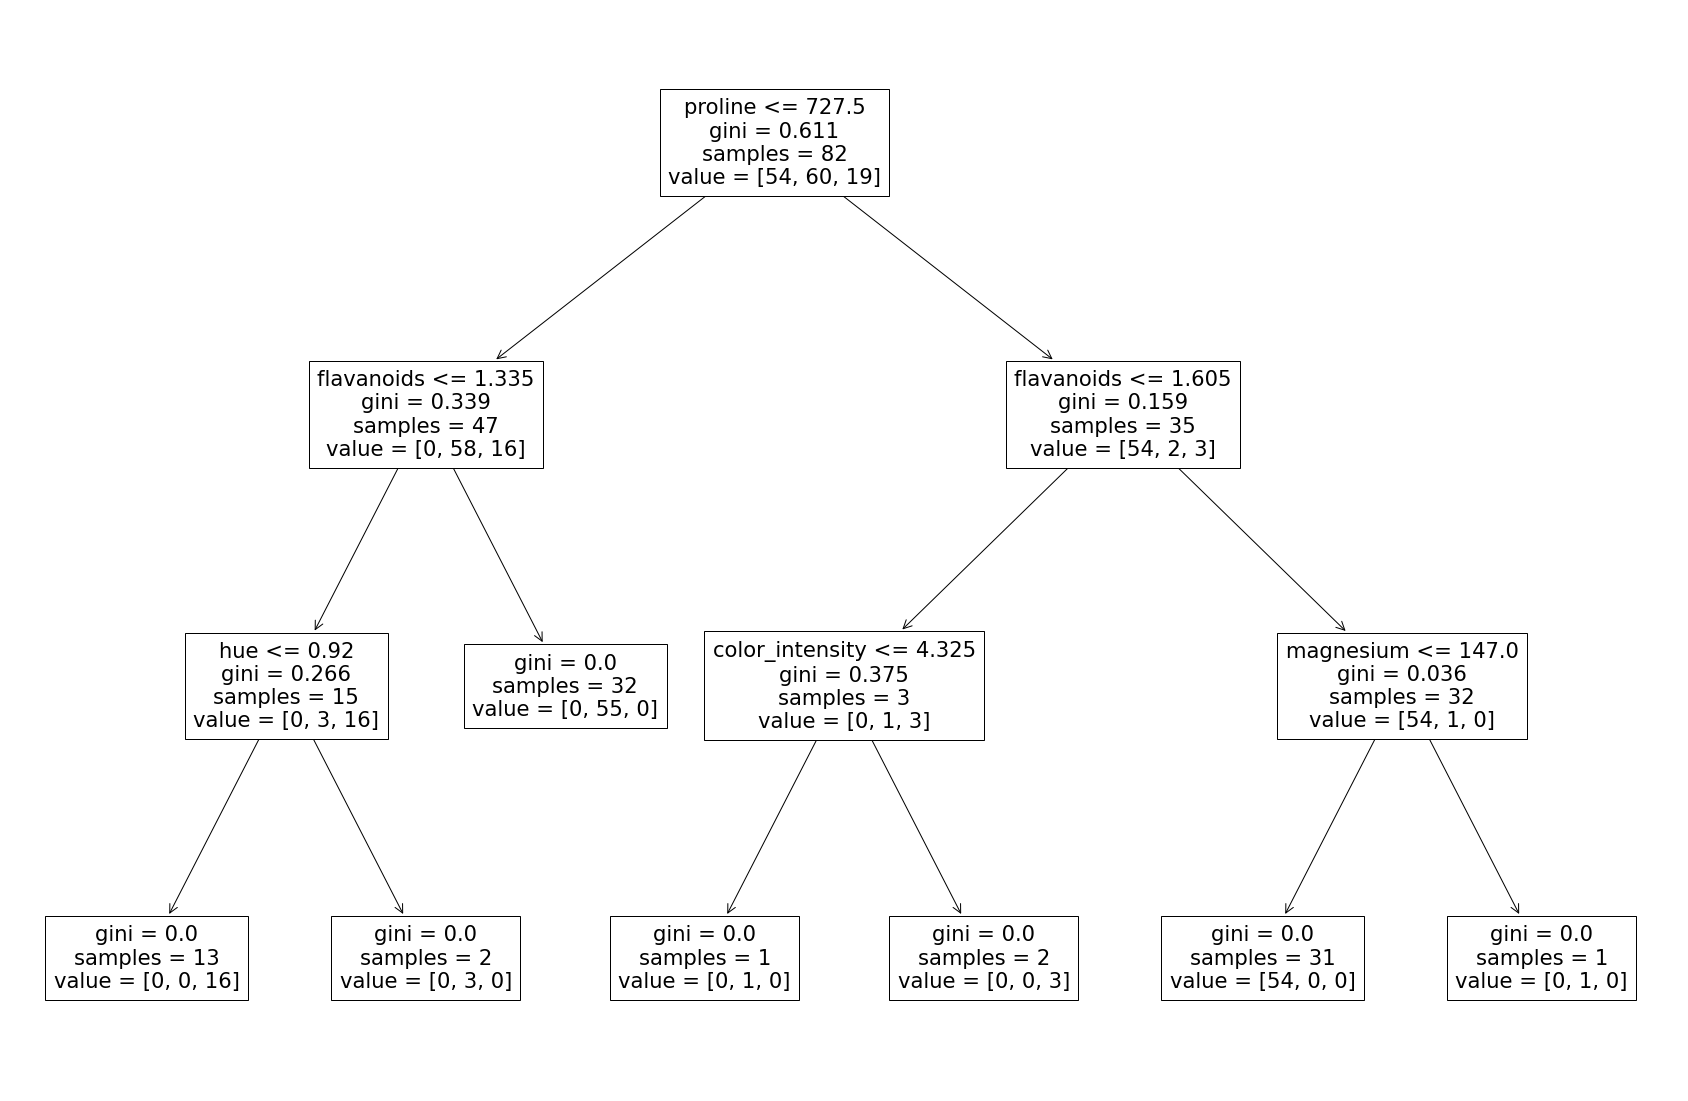

In [18]:
#Generating Decision Trees from Bagging Classifier

X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 22)

clf = BaggingClassifier(n_estimators = 12, oob_score = True,random_state = 22)

clf.fit(X_train, y_train)

plt.figure(figsize=(30, 20))

plot_tree(clf.estimators_[0], feature_names = X.columns)

In [3]:
#Cross Validation

X, y = datasets.load_iris(return_X_y=True)

clf = DecisionTreeClassifier(random_state=42)

k_folds = KFold(n_splits = 5)

scores = cross_val_score(clf, X, y, cv = k_folds)

print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Cross Validation Scores:  [1.         1.         0.83333333 0.93333333 0.8       ]
Average CV Score:  0.9133333333333333
Number of CV Scores used in Average:  5


In [6]:
#Stratified K-Fold

X, y = datasets.load_iris(return_X_y=True)

clf = DecisionTreeClassifier(random_state=42)

sk_folds = StratifiedKFold(n_splits = 5)

scores = cross_val_score(clf, X, y, cv = sk_folds)

print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Cross Validation Scores:  [0.96666667 0.96666667 0.9        0.93333333 1.        ]
Average CV Score:  0.9533333333333334
Number of CV Scores used in Average:  5


In [8]:
#Leave-One-Out (LOO)

X, y = datasets.load_iris(return_X_y=True)

clf = DecisionTreeClassifier(random_state=42)

loo = LeaveOneOut()

scores = cross_val_score(clf, X, y, cv = loo)

print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Cross Validation Scores:  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1.
 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]
Average CV Score:  0.94
Number of CV Scores used in Average:  150


In [2]:
#Leave-P-Out (LPO)

X, y = datasets.load_iris(return_X_y=True)

clf = DecisionTreeClassifier(random_state=42)

lpo = LeavePOut(p=2)

scores = cross_val_score(clf, X, y, cv = lpo)

print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Cross Validation Scores:  [1. 1. 1. ... 1. 1. 1.]
Average CV Score:  0.9382997762863534
Number of CV Scores used in Average:  11175


In [3]:
#Shuffle Split

X, y = datasets.load_iris(return_X_y=True)

clf = DecisionTreeClassifier(random_state=42)

ss = ShuffleSplit(train_size=0.6, test_size=0.3, n_splits = 5)

scores = cross_val_score(clf, X, y, cv = ss)

print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Cross Validation Scores:  [0.93333333 0.95555556 0.95555556 0.93333333 0.95555556]
Average CV Score:  0.9466666666666667
Number of CV Scores used in Average:  5


In [7]:
#AUC - ROC Curve
#Imbalanced Data

n = 10000
ratio = .95
n_0 = int((1-ratio) * n)
n_1 = int(ratio * n)

y = np.array([0] * n_0 + [1] * n_1)
# below are the probabilities obtained from a hypothetical model that always predicts the majority class
# probability of predicting class 1 is going to be 100%
y_proba = np.array([1]*n)
y_pred = y_proba > .5

print(f'accuracy score: {accuracy_score(y, y_pred)}')
cf_mat = confusion_matrix(y, y_pred)
print('Confusion matrix')
print(cf_mat)
print(f'class 0 accuracy: {cf_mat[0][0]/n_0}')
print(f'class 1 accuracy: {cf_mat[1][1]/n_1}')

accuracy score: 0.95
Confusion matrix
[[   0  500]
 [   0 9500]]
class 0 accuracy: 0.0
class 1 accuracy: 1.0


In [8]:
# below are the probabilities obtained from a hypothetical model that doesn't always predict the mode
y_proba_2 = np.array(
    np.random.uniform(0, .7, n_0).tolist() +
    np.random.uniform(.3, 1, n_1).tolist()
)
y_pred_2 = y_proba_2 > .5

print(f'accuracy score: {accuracy_score(y, y_pred_2)}')
cf_mat = confusion_matrix(y, y_pred_2)
print('Confusion matrix')
print(cf_mat)
print(f'class 0 accuracy: {cf_mat[0][0]/n_0}')
print(f'class 1 accuracy: {cf_mat[1][1]/n_1}')

accuracy score: 0.7201
Confusion matrix
[[ 370  130]
 [2669 6831]]
class 0 accuracy: 0.74
class 1 accuracy: 0.7190526315789474


In [9]:
def plot_roc_curve(true_y, y_prob):
    """
    plots the roc curve based of the probabilities
    """

    fpr, tpr, thresholds = roc_curve(true_y, y_prob)
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

model 1 AUC score: 0.5


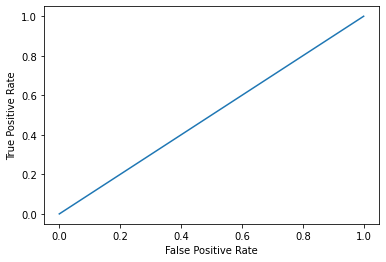

In [10]:
plot_roc_curve(y, y_proba)
print(f'model 1 AUC score: {roc_auc_score(y, y_proba)}')

model 2 AUC score: 0.850769052631579


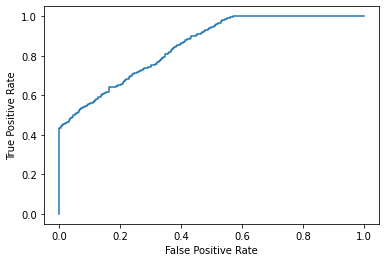

In [11]:
plot_roc_curve(y, y_proba_2)
print(f'model 2 AUC score: {roc_auc_score(y, y_proba_2)}')

In [12]:
#Probabilities

n = 10000
y = np.array([0] * n + [1] * n)
#
y_prob_1 = np.array(
    np.random.uniform(.25, .5, n//2).tolist() +
    np.random.uniform(.3, .7, n).tolist() +
    np.random.uniform(.5, .75, n//2).tolist()
)
y_prob_2 = np.array(
    np.random.uniform(0, .4, n//2).tolist() +
    np.random.uniform(.3, .7, n).tolist() +
    np.random.uniform(.6, 1, n//2).tolist()
)

print(f'model 1 accuracy score: {accuracy_score(y, y_prob_1>.5)}')
print(f'model 2 accuracy score: {accuracy_score(y, y_prob_2>.5)}')

print(f'model 1 AUC score: {roc_auc_score(y, y_prob_1)}')
print(f'model 2 AUC score: {roc_auc_score(y, y_prob_2)}')

model 1 accuracy score: 0.7521
model 2 accuracy score: 0.74895
model 1 AUC score: 0.7769666900000001
model 2 AUC score: 0.8583443


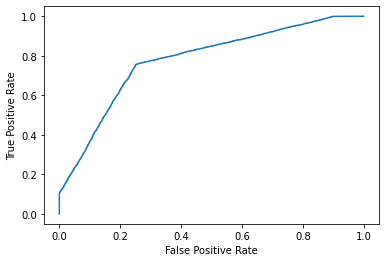

In [13]:
plot_roc_curve(y, y_prob_1)

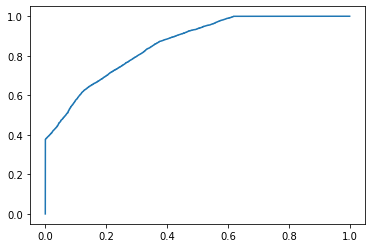

In [15]:
fpr, tpr, thresholds = roc_curve(y, y_prob_2)
plt.plot(fpr, tpr)

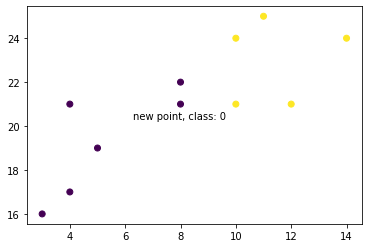

In [18]:
#K-nearest neighbors (KNN)

x = [4, 5, 10, 4, 3, 11, 14 , 8, 10, 12]
y = [21, 19, 24, 17, 16, 25, 24, 22, 21, 21]
classes = [0, 0, 1, 0, 0, 1, 1, 0, 1, 1]
data = list(zip(x, y))
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(data, classes)

new_x = 8
new_y = 21
new_point = [(new_x, new_y)]

prediction = knn.predict(new_point)

plt.scatter(x + [new_x], y + [new_y], c=classes + [prediction[0]])
plt.text(x=new_x-1.7, y=new_y-0.7, s=f"new point, class: {prediction[0]}")
plt.show()

In [ ]:
########FINISH########